In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display


%matplotlib inline

seed = 0

In [2]:
def normal_equation(X, y):
    inv = np.linalg.inv(np.dot(X.T,X))
    numer = np.dot(X.T, y)
    theta = np.dot(inv, numer)
    return theta.T

In [3]:
def calc_cost(X, y, theta):
    cost = np.sum(np.power(np.matmul(X,theta.T)-y,2))/(2*len(X))
    return cost

def plot_cost(cost, iters):
    plt.plot(np.arange(iters), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Error')

def gradient_descent(X, y, theta, iters, alpha, plot = True):
    cost = []
    
    for i in range(iters):
        theta = theta - alpha/len(X)*np.sum(X*(np.matmul(X, theta.T)-y),axis=0)
        cost.append(calc_cost(X,y,theta))
        #print theta
    
    if plot:
        plot_cost(cost,iters)
        
    return theta, cost


## Attempt to reproduce results

Check above `gradient_descent` function by reproducing results using the data found in [this tutorial](https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905). The preprocessing steps found in the tutorial are implemented in order to make a valid comparison.

[[ -1.03191687e-16   8.78503652e-01  -4.69166570e-02]]
0.130703369608


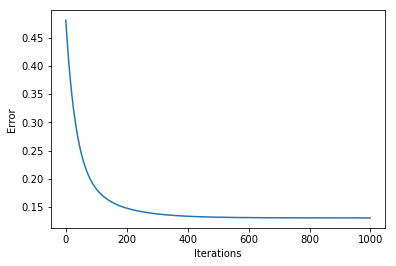

In [79]:
data = pd.read_csv('house.txt',names=["size","bedroom","price"])
#Mean normalization
data = (data - data.mean())/data.std()
X = data.iloc[:,0:2].values
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = data.iloc[:,2:3].values
theta = np.zeros([1,X.shape[1]])

t,c = gradient_descent(X, y, theta, 1000, 0.01)
print t
print c[-1]

The coefficients and final cost determined by `gradient_descent` match those found in the tutorial. The function therefore appears to be functioning properly.

## Compare to the normal equation and LinearRegression.

In [80]:
norm = normal_equation(X,y)
linreg = LinearRegression(fit_intercept = False)
linreg.fit(X,y)
print('Coefficients from gradient_descent {}'.format(t))
print('Coefficients from normal equation {}'.format(norm))
print('Coefficients from LinearRegression {}'.format(linreg.coef_))

Coefficients from gradient_descent [[ -1.03191687e-16   8.78503652e-01  -4.69166570e-02]]
Coefficients from normal equation [[ -1.13257800e-16   8.84765988e-01  -5.31788197e-02]]
Coefficients from LinearRegression [[ -1.01852438e-16   8.84765988e-01  -5.31788197e-02]]


In [32]:
'''
Using the results from LinearRegression as the 'correct' values, the percent error of the gradient_descent algorithm for each
coefficient is
'''
print 100*(linreg.coef_-t)/linreg.coef_

[[ -1.31489138   0.7077957   11.77567059]]


Not terrible, but not great either.

## Apply gradient descent to more complex data set and compare results to LinearRegression and normal equation

In [81]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [82]:
display(data.describe())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [83]:
X = data.iloc[:,0:8]
y = data.iloc[:,8:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Gradient descent error: 48.89

Coefficients from gradient_descent:
 [[-498.25208704  269.15203776  168.61751695  125.51358499 -232.82671162
   183.2237018   399.1984388   316.69824752  214.72654235]]

Coefficients from normal equation:
 [[-598.32464171  292.05010969  175.75349664  127.26658475 -208.20750271
   257.18009927  474.50608406  374.62039023  226.39153756]]

Coefficients from LinearRegression:
 [[-598.32464171  292.05010969  175.75349664  127.26658475 -208.20750271
   257.18009927  474.50608406  374.62039023  226.39153756]]


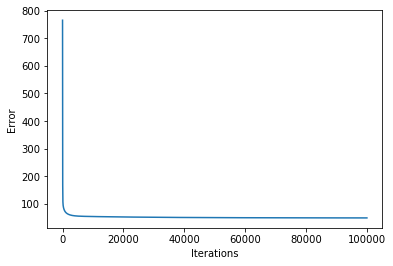

In [147]:
from sklearn.preprocessing import Normalizer

X = X_train.values
y = y_train.values

minmax = Normalizer()
minmax.fit(X_train)

X = minmax.transform(X_train)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

theta = np.zeros([1,X.shape[1]])


#t,c = gradient_descent(X, y, theta, 10000, 0.00000118)
t,c = gradient_descent(X, y, theta, 100000, 1.00)
norm =  normal_equation(X,y)
linreg = LinearRegression(fit_intercept = False)
linreg.fit(X,y)
print('Gradient descent error: {:.2f}\n'.format(c[-1]))
print('Coefficients from gradient_descent:\n {}\n'.format(t))
print('Coefficients from normal equation:\n {}\n'.format(norm))
print('Coefficients from LinearRegression:\n {}'.format(linreg.coef_))